<a href="https://colab.research.google.com/github/rlmaxon/Titanic/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
#Import the libraries required to create and run model
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# map the google colab to the google drive where the data is stored.
from google.colab import drive
drive.mount("/content/drive")



Mounted at /content/drive


In [4]:
#Read the csv data in a dataframe
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/titanic3_9nov2021.csv')


In [31]:
#sample the data with 10 rows.
df.sample(10)

AttributeError: ignored

In [5]:
df[["pclass", "survived","age", "fare"]].describe()

,pclass,survived,age,fare
count,1309.000000,1309.000000,1046.000000,1308.000000
mean,2.294882,0.381971,29.881135,33.295479
std,0.837836,0.486055,14.413500,51.758668
min,1.000000,0.000000,0.166700,0.000000
25%,2.000000,0.000000,21.000000,7.895800
50%,3.000000,0.000000,28.000000,14.454200
75%,3.000000,1.000000,39.000000,31.275000
max,3.000000,1.000000,80.000000,512.329200


In [ ]:
#check for missing values
df.isnull().sum()

In [6]:
df = df.drop(['home.dest','body','boat','cabin'], axis=1) 

In [7]:
#drop the rows with missing values.  Features like cabin, boat, body and home.dest dont have any meaning or are arbitray to analysis.
df.dropna(inplace=True)

In [8]:
#check for missing values
df.isnull().sum()

pclass      0
survived    0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
embarked    0
dtype: int64

In [10]:
# get the average age by male and female
df[["age","sex"]].groupby("sex").mean()


,age
sex,
female,28.576641
male,30.539701


In [11]:
#determine the average age of suvival
df[["survived","age"]].groupby("survived").mean()

,age
survived,
0.0,30.496899
1.0,28.819020


In [12]:
#determinethe average cabin fair of survival. THis might be interesting, did people who paid more money actually survive at a higher rate?
df[["survived","fare"]].groupby("survived").mean()


,fare
survived,
0.0,25.148752
1.0,53.258883


In [13]:
# This is interesting, surviving males paid less than surviving females.  
df.groupby(["survived", "sex"])["fare"].mean()

survived  sex   
0.0       female    22.157510
          male      25.698865
1.0       female    59.423047
          male      40.017347
Name: fare, dtype: float64

In [14]:
# Females in the highest Pclass(1st class) had the best chance of survival.  Females had the best overall chance of survival and it increased based on pclass.
df.groupby(["sex","pclass"])["survived"].mean()

sex     pclass
female  1.0       0.961832
        2.0       0.893204
        3.0       0.473684
male    1.0       0.350993
        2.0       0.145570
        3.0       0.169540
Name: survived, dtype: float64

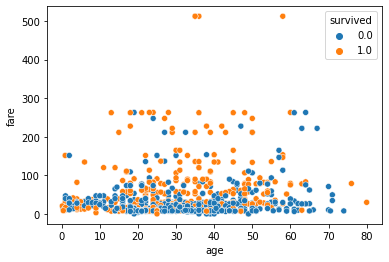

In [17]:
#scatter plot of age, fare and who survived.
 
sns.scatterplot(data=df, y="fare", x="age", hue="survived")

In [19]:
# create groups based on age of every 10 yrs.
age_groups = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
df['age_group'] = pd.cut(df.age, range(0, 81, 10), right=False, labels=age_groups)


In [18]:
# create groups based $50 of the cost of a ticket.
fare_groups = ['0-49', '50-99', '100-149', '150-199', '200-249', '250-299', '300-349', '350-399','400-449', '450-499', '500-549']
df['fare_group'] = pd.cut(df.fare, range(0, 600, 50), right=False, labels=fare_groups)

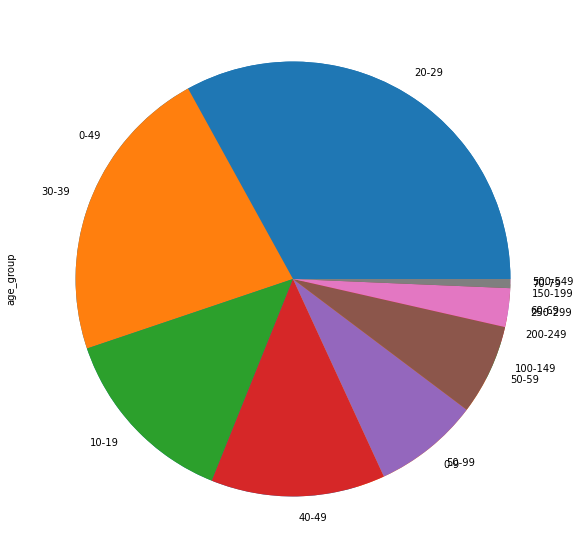

In [20]:
#Plot the age and fare groups in pie charts.  

df['age_group'].value_counts().plot.pie(figsize=(10,10))

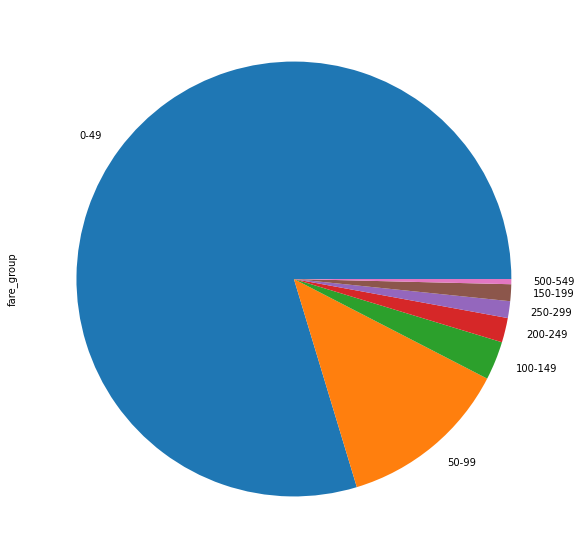

In [23]:
#Pie chart of the fares grouped by $50. Clearly the majority of ticket costs were less than $50.
df['fare_group'].value_counts().plot.pie(figsize=(10,10))

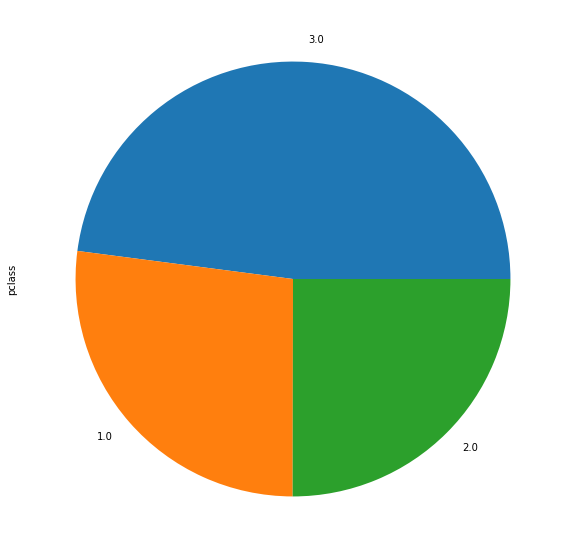

In [24]:
#The distribution of passengers by class, 1st, 2nd, and 3rd.
df['pclass'].value_counts().plot.pie(figsize=(10,10))

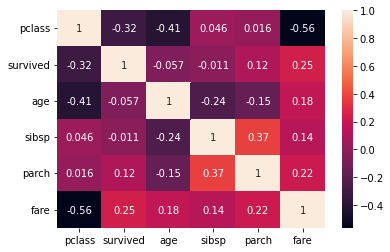

In [22]:
## Correlation matrix of the dataset
df.corr()
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)

In [33]:
X

In [26]:
df = df.drop(columns=['fare','age_group','fare_group'], axis=1, inplace=True)

In [27]:
#split data into Test and train
X = df
y = df['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


TypeError: ignored

In [ ]:
X_test

In [ ]:
X_test

In [28]:
X_test = X_test.drop('survived', axis=1)


NameError: ignored

In [ ]:
X_train


In [ ]:
forest = RandomForestClassifier(n_estimators=50,  max_depth=9, criterion='entropy', min_samples_split = 6,
                                 min_samples_leaf=1,random_state =57)
forest.fit(X_train, y_train)

forest_accuracy = cross_val_score(forest, X_train, y_train,  cv = 20).mean()

print('Model: Random Forest Accuracy: ', forest_accuracy)
     


forest.score(X_train, Y_train)
acc_random_forest = round(forest.score(X_train, Y_train) * 100, 2)
print(acc_random_forest)